# Notable findings from preprocessing

We have more female respondents in most age bins in our dataset.

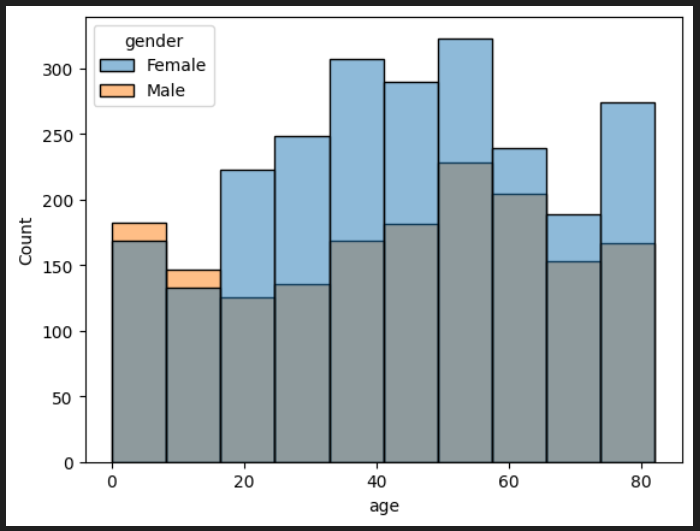

We have noticed that diabetic diagnosis can strongly increase stroke probability together with age.

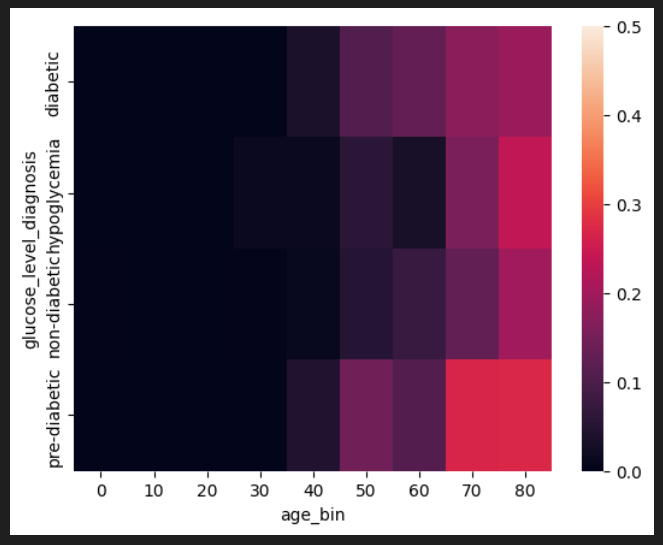

Here is another graph displaying relationship between age, glucose level and stroke probability.

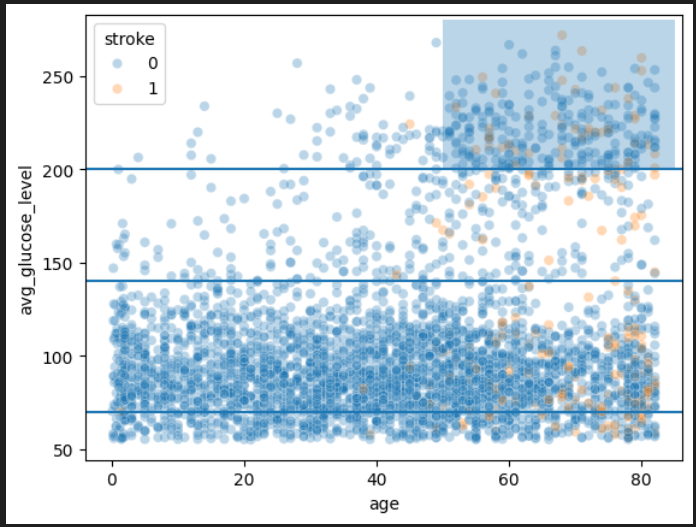

Diabetic condition (glucose level > 200) by itself doesn't indicate a high probability of stroke, but high age does (as there are few respondents suffering from a stroke below the age of 50)


# Clustering

From the agglomerative clustering and k-means PCA clustering, we see that the cluster at most risk is Cluster 1 (in agglomerative) and Cluster 2 (in pca), which are essentially the same. The cluster consists of older individuals who are predominantly female, presents the highest risk for stroke.

This cluster is characterized by the highest occurrences of hypertension and heart disease, conditions directly linked to an elevated stroke risk. Additionally, they exhibit the highest average glucose levels and BMI, indicating a prevalent risk of diabetes and obesity, respectively. This group also reports the highest stroke incidence rate of nearly 7.9%, underscoring its heightened vulnerability within the study population.


and the **Most Impactful Variables:**
   - **Age:** Older age appears to be associated with a higher stroke risk.
   - **Hypertension and Heart Disease**
   - **BMI**
   - **Avg_glucose_level:** Higher average glucose levels might indicate diabetes or pre-diabetic conditions, which are known risk factors for stroke.
   - **Smoking Status**


**Other Observations:**
   - The fact that the 'ever_married' feature is married in the clusters with a higher incidence of stroke might suggest that this variable captures age-related information rather than marital status being a direct risk factor.
   - The 'work_type' could be associated with lifestyle factors affecting stroke risk, though the exact nature would depend on what each numerical value represents.
   - All clusters come from the same urban residence type, which does not differentiate the stroke risk in this dataset.

From the available data, it would seem that age, pre-existing health conditions (hypertension and heart disease), and lifestyle factors represented by BMI and average glucose levels and smoking status are the most important variables impacting stroke risk.

The conclusion is that preventive health measures targeting weight management, blood pressure control, and blood sugar levels could potentially have the most significant impact on reducing stroke risk within the urban population. Additionally, since the highest risk cluster comprises older individuals, age-specific health interventions could also be beneficial.

Also, we would like to point out that the low stroke probability in the dataset is likely due to its unbalanced nature, with a much smaller number of stroke cases compared to non-stroke cases.

# Decision tree

The goal of the task was to build a single decision tree to classify patients that are likely to have a stroke based on other medical factors such as age or glucose level.

We chose the F-1 score as the main evaluation metric as it incorporates the information about precision and recall, both being important in the context of our analysis.

**Steps taken in the analysis and modelling procedure:**

- Light preprocessing
- One Hot encoding of categorial variable
- Grid search cross-validation for hyperparameter tuning
- Building the decision tree classifier
- Predicting values for test data
- Evaluation of the model

**Best hyperparameters found in grid search:**

- criterion: Entropy --> maximizes imformation gain
- max_depth: 3 --> the depth of the tree
- min_samples_leaf: 100 --> each node must be supported by at least 100 samples
- min_samples_split: 20 --> at least 50 samples are necessary to create a new node
- class_weight: {0: 1, 1: 10} --> Class '0' is given a weight of 1, and class '1' is more heavily weighted at 10, emphasizing its importance.

**Evaluation**

The model turned out to be better at avoiding false negatives than false positives, which is crucial in the context of stroke prediction, where the cost of false negative is much higher than the opposite.

We achieved these results with the classsfication tree:

- Accuracy: 0.8131
- Precision: 0.1721
- Recall: 0.7400
- F1 Score: 0.2792

The confusion matrix is as follows:



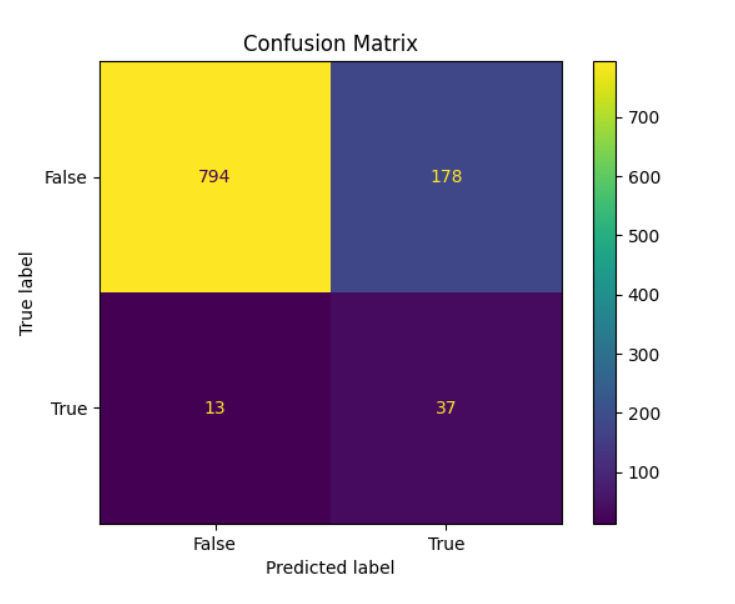



# Random forest
***The data was***:
  - heavily imbalanced towards the negative class
  - medical in nature - potentially a life/death situation
  - had some missing values

Due to the nature of the data, we chose F-1 as the evaluation metric.

***The main steps taken were:***
  - Additional preprocessing
  - Encoding
  - Modeling - Random Search


***The best model turned out to have this configuration***
- **n_estimators: 300** -> The model uses 300 decision trees
- **min_samples_split: 50** -> At least 50 samples are required to create a new decision node
- **min_samples_leaf: 30** -> Each leaf node must contain at least 30 samples
- **max_depth: 15** -> Each tree is allowed a maximum of 15 levels of depth
- **criterion: 'entropy'** -> Aiming for maximum information gain from each decision made within the trees.
- **class_weight: {0: 1, 1: 10}** -> Class '0' is given a weight of 1, and class '1' is more heavily weighted at 10, emphasizing its importance

+ +**Classification treshold of 0.4**


Overall, the model tends to correctly identify most of the positive instances, while misclassifying some of the negative instances. Both classes have almost the same recall.

The precision-recall trade-off can be hard to balance, but we are confident that recall is more important in this case and would be more useful in practical applications.


 ```
              precision    recall  f1-score   support

           0       0.99      0.81      0.89       972
           1       0.18      0.80      0.29        50

    accuracy                           0.81      1022
   macro avg       0.58      0.80      0.59      1022
weighted avg       0.95      0.81      0.86      1022
 ```

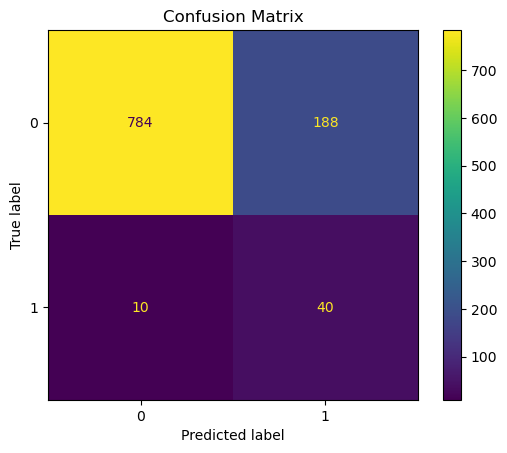


** Comparison of the classification models **

Overall, we have achieved slightly better results using Random Forest classifier, as it better suits the nature of our data, but the results were very comparable.